In [1]:
%matplotlib inline

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.feature_extraction.text import CountVectorizer

from yellowbrick.classifier import ClassPredictionError
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.datasets import load_hobbies

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
# Load the text data
corpus = load_hobbies()
y = LabelEncoder().fit_transform(corpus.target)

vectorizer = CountVectorizer(stop_words='english')
# docs       = vectorizer.fit_transform(corpus.data)
# features   = vectorizer.get_feature_names()

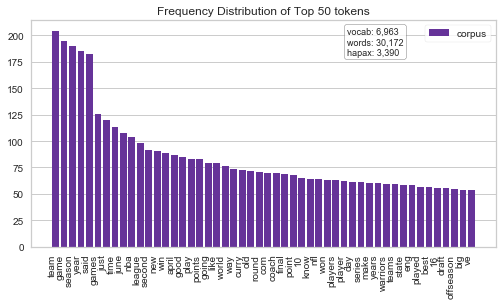

In [13]:
docs       = vectorizer.fit_transform([doc for idx,doc in enumerate(corpus.data) if corpus.target[idx]=="sports"])
features   = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v', size=(600, 300), color=["rebeccapurple"])
visualizer.fit(docs)
visualizer.poof()

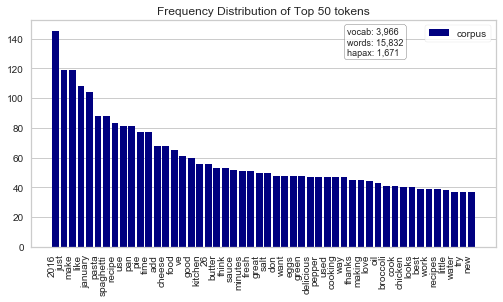

In [14]:
docs = vectorizer.fit_transform([doc for idx,doc in enumerate(corpus.data) if corpus.target[idx]=="cooking"])
features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v', size=(600, 300), color=['navy'])
visualizer.fit(docs)
visualizer.poof()

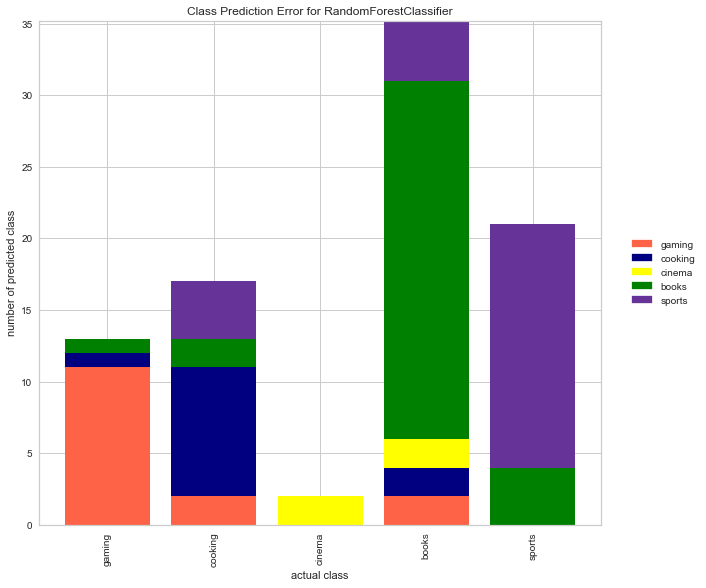

In [12]:
docs = vectorizer.fit_transform(corpus.data)

visualizer = ClassPredictionError(
    RandomForestClassifier(random_state=42, n_estimators=10), 
    classes=corpus.labels,
    size=(800, 600),
    colors=["tomato","navy","yellow","green","rebeccapurple"]
)

X_train, X_test, y_train, y_test = tts(
    docs, y, test_size=0.20, random_state=42)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()